## COMPARISON OF CLUSTERING ALGORITHMS

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOADING DATASET
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#DATA PREPARATION
df1=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df1.columns=['Age','Income','Score']
df1['Gender']=df['Gender']=='Male'
df1=df1.astype('float')
df1=df1[['Income','Score']]
df1.head(2)

,Income,Score
0,15.0,39.0
1,15.0,81.0


##### TASK 1

##### K MEANS

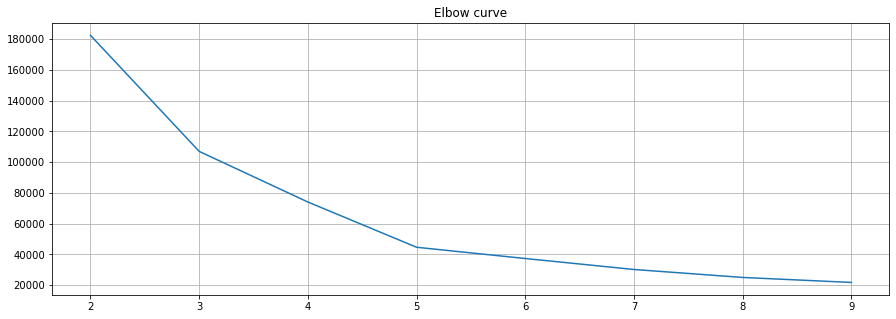

In [26]:
from sklearn.cluster import KMeans

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

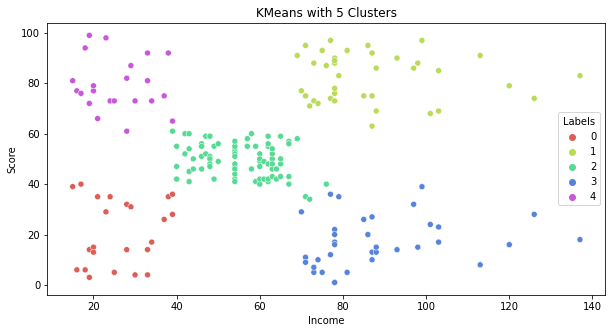

In [29]:
km5 = KMeans(n_clusters=5).fit(df1)

df1['Labels'] = km5.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans with 5 Clusters')
plt.show()

1)This algorithm is comparitively good with others.

2)The 5 clusters are formed in a good manner and they are not nested.

3)Eventhough the distance between the clusters are minimal.

##### DBSCAN

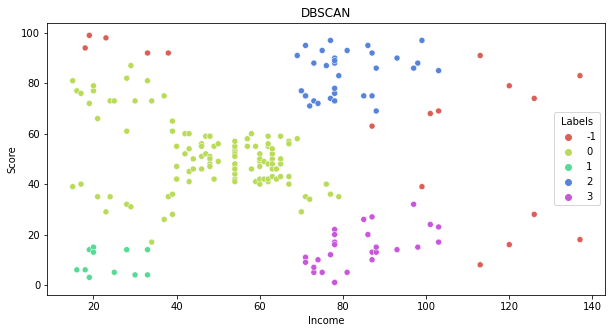

In [5]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=10,min_samples=5).fit(df1)

df1['Labels'] = db.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

1)Obtained 4 clusters with eps=10 and min_samples=5.

2)4 clusters are independent and they are not nested.

3)Less outliers while comparing with HDBSCAN.

4)Density of the data points in each cluster varies.

##### AGGLOMERATIVE CLUSTERING

Linkage: average


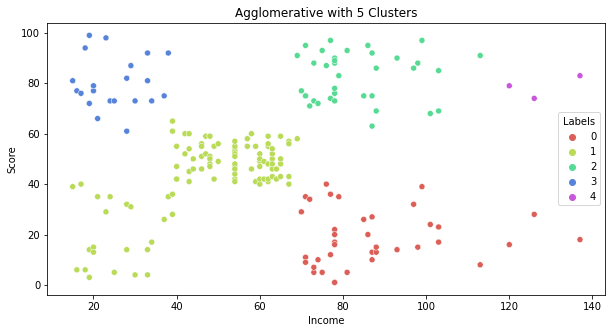

Linkage: ward


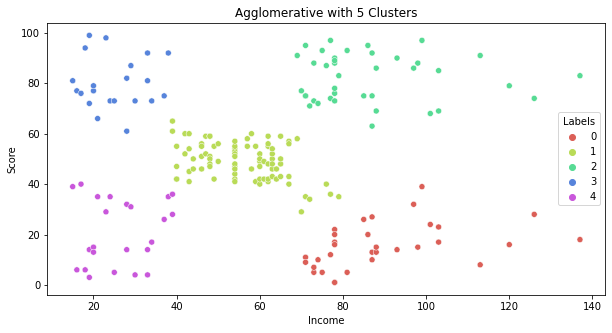

Linkage: complete


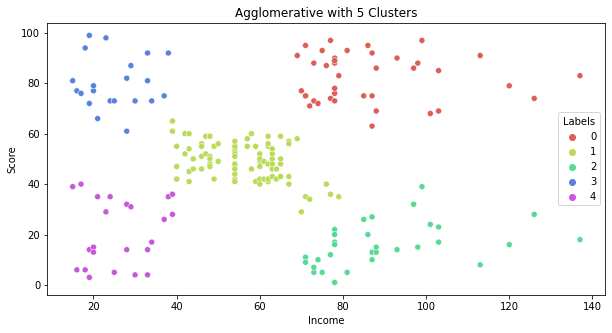

In [32]:
from sklearn.cluster import AgglomerativeClustering 

for linkage in ['average','ward','complete']:
    agglom = AgglomerativeClustering(n_clusters=5, linkage=linkage).fit(df1)
    print('Linkage:',linkage)
    df1['Labels'] = agglom.labels_
    plt.figure(figsize=(10, 5))
    sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                    palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
    plt.title('Agglomerative with 5 Clusters')
    plt.show()

1)There are 5 clusters with good clustering.

2)Each clusters are independent and not nested.

3)Linkage=ward & complete is better than average.

##### HDBSCAN

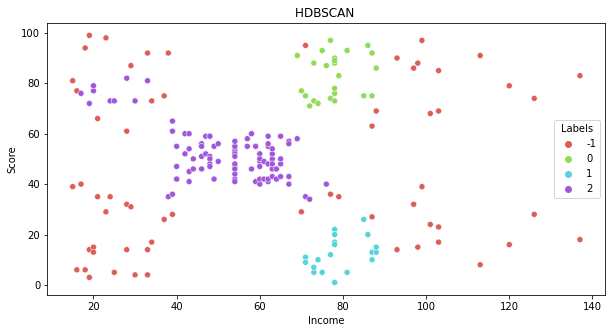

In [19]:
import hdbscan

hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_clus.fit(df1)
df1['Labels'] = hdbscan_clus.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
plt.title('HDBSCAN ')
plt.show()

1)They tackle with different densities and obtained 3 clusters with min_cluster_size 10.

2)3 clusters are independent  and they are not nested.

3)More data points are considered as outliers.

4)Outliers can be found inside the clusters also.

From above 4 techniques, HDBSCAN is least performing from others  and Agglomerative clustering is best performing 

In [8]:
#END